In [4]:
import glob
import pandas as pd 
import xml.etree.ElementTree as ET
from datetime import datetime
import requests
import json # Used to load data into Json format
import io
import csv
from pprint import pprint # pretty-print 
import urllib


In [20]:
def JasonData(startDate,endDate):
    base_url = "https://api.nasa.gov/neo/rest/v1/feed?start_date="+startDate+"&end_date="+endDate+"&api_key=oZMj9ugDHdPXcNimvzMjyhFMwvyHDm6K1RwhLyjV"
    req = requests.get(base_url)
    return req.json()

def createDictionary(json_data):
    
#using for loops to go loop throuh the list and add to dictionary

    for i in json_data['near_earth_objects']:
        
        try:
            if i !=0:
                print('Found Asteriods in this Date: ',i)
            
            for j in json_data['near_earth_objects'][i]:
                asteroids_data['neo_reference_id'].append(j['neo_reference_id'])
                asteroids_data['asteroid_name'].append(j['name'])
                asteroids_data['nasa_url'].append(j['nasa_jpl_url'])
                asteroids_data['absolute_magnitude'].append(j['absolute_magnitude_h'])
                asteroids_data['estimated diameter_min_km'].append(j['estimated_diameter']['kilometers']['estimated_diameter_min'])
                asteroids_data['estimated diameter_max_km'].append(j['estimated_diameter']['kilometers']['estimated_diameter_max'])
                asteroids_data['hazardous asteroid'].append(j['is_potentially_hazardous_asteroid'])
            for k in json_data ['near_earth_objects'][i]:
                asteroids_data['close approach date'].append(k['close_approach_data'][0]['close_approach_date'])
                asteroids_data['close approach date time'].append(k['close_approach_data'][0]['close_approach_date_full'])
                asteroids_data['close approach: Earth miss distance'].append(k['close_approach_data'][0]['miss_distance']['kilometers'])
                asteroids_data['relative velocity_km_per_secon'].append(k['close_approach_data'][0]['relative_velocity']['kilometers_per_second'])
                asteroids_data['relative velocity_km_per_hour'].append(k['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'])
                asteroids_data['orbiting body'].append(k['close_approach_data'][0]['orbiting_body'])                
        except:
            print('There is no asteriod this day')
        
        
asteroids_data = {'neo_reference_id':[],
                 'asteroid_name':[],
                 'nasa_url':[],
                 'absolute_magnitude':[],
                 'estimated diameter_min_km':[],
                 'estimated diameter_max_km':[],
                 'hazardous asteroid':[],
                 'close approach date':[],
                 'close approach date time':[],
                 'close approach: Earth miss distance':[],
                 'relative velocity_km_per_secon':[],
                 'relative velocity_km_per_hour':[],
                 'orbiting body': []}
               


createDictionary(JasonData("2021-06-01","2021-06-08"))
createDictionary(JasonData("2021-06-09","2021-06-16"))
createDictionary(JasonData("2021-06-17","2021-06-24"))
createDictionary(JasonData("2021-06-25","2021-06-30"))
createDictionary(JasonData("2021-07-01","2021-07-08"))
createDictionary(JasonData("2021-07-09","2021-07-16"))
createDictionary(JasonData("2021-07-17","2021-07-24"))
createDictionary(JasonData("2021-07-25","2021-07-31"))
createDictionary(JasonData("2021-08-01","2021-08-08"))
createDictionary(JasonData("2021-08-09","2021-08-16"))
createDictionary(JasonData("2021-08-17","2021-08-24"))
createDictionary(JasonData("2021-08-25","2021-08-31"))
createDictionary(JasonData("2021-09-01","2021-09-08"))
createDictionary(JasonData("2021-09-09","2021-09-16"))
createDictionary(JasonData("2021-09-17","2021-09-24"))
createDictionary(JasonData("2021-09-25","2021-09-30"))
createDictionary(JasonData("2021-10-01","2021-10-08"))
createDictionary(JasonData("2021-10-09","2021-10-16"))
createDictionary(JasonData("2021-10-17","2021-10-24"))
createDictionary(JasonData("2021-10-25","2021-10-31"))
createDictionary(JasonData("2021-11-01","2021-11-08"))
createDictionary(JasonData("2021-11-09","2021-11-16"))
createDictionary(JasonData("2021-11-17","2021-11-24"))
createDictionary(JasonData("2021-11-25","2021-11-30"))
createDictionary(JasonData("2021-12-01","2021-12-08"))
createDictionary(JasonData("2021-12-09","2021-12-16"))
createDictionary(JasonData("2021-12-17","2021-12-24"))
createDictionary(JasonData("2021-12-25","2021-12-31"))
asteroids_data

asteroids_df = pd.DataFrame.from_dict(asteroids_data)
asteroids_df['close approach: Earth miss distance'] = asteroids_df['close approach: Earth miss distance'].astype(float)
asteroids_df['close approach: Earth miss distance'] = asteroids_df['close approach: Earth miss distance']/1000000
asteroids_df


Found Asteriods in this Date:  2021-06-01
Found Asteriods in this Date:  2021-06-02
Found Asteriods in this Date:  2021-06-03
Found Asteriods in this Date:  2021-06-04
Found Asteriods in this Date:  2021-06-05
Found Asteriods in this Date:  2021-06-06
Found Asteriods in this Date:  2021-06-07
Found Asteriods in this Date:  2021-06-08
Found Asteriods in this Date:  2021-06-09
Found Asteriods in this Date:  2021-06-10
Found Asteriods in this Date:  2021-06-11
Found Asteriods in this Date:  2021-06-13
Found Asteriods in this Date:  2021-06-14
Found Asteriods in this Date:  2021-06-15
Found Asteriods in this Date:  2021-06-16
Found Asteriods in this Date:  2021-06-21
Found Asteriods in this Date:  2021-06-22
Found Asteriods in this Date:  2021-06-23
Found Asteriods in this Date:  2021-06-24
Found Asteriods in this Date:  2021-06-17
Found Asteriods in this Date:  2021-06-18
Found Asteriods in this Date:  2021-06-19
Found Asteriods in this Date:  2021-06-30
Found Asteriods in this Date:  202

Found Asteriods in this Date:  2021-12-25
Found Asteriods in this Date:  2021-12-30
Found Asteriods in this Date:  2021-12-31
Found Asteriods in this Date:  2021-12-27
Found Asteriods in this Date:  2021-12-26
Found Asteriods in this Date:  2021-12-29
Found Asteriods in this Date:  2021-12-28


,neo_reference_id,asteroid_name,nasa_url,absolute_magnitude,estimated diameter_min_km,estimated diameter_max_km,hazardous asteroid,close approach date,close approach date time,close approach: Earth miss distance,relative velocity_km_per_secon,relative velocity_km_per_hour,orbiting body
0,2315098,315098 (2007 EX),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2315098,16.82,1.149622,2.570632,False,2021-06-01,2021-Jun-01 10:06,40.520104,18.8019361621,67686.9701834927,Earth
1,2391451,391451 (2007 FE20),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2391451,19.50,0.334622,0.748238,False,2021-06-01,2021-Jun-01 22:50,64.966402,4.0661511721,14638.144219627,Earth
2,3530350,(2010 MB),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3530350,24.60,0.031956,0.071456,False,2021-06-01,2021-Jun-01 06:02,67.037057,17.2266415471,62015.9095697382,Earth
3,3655398,(2013 YR2),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3655398,24.20,0.038420,0.085909,False,2021-06-01,2021-Jun-01 17:20,37.824836,3.4165750877,12299.6703155698,Earth
4,2467460,467460 (2006 JF42),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2467460,19.20,0.384198,0.859093,True,2021-06-02,2021-Jun-02 20:12,44.464515,22.1053567786,79579.2844030493,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2488803,488803 (2005 GB120),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2488803,20.50,0.211132,0.472106,False,2021-12-28,2021-Dec-28 02:39,68.196364,14.8434419124,53436.3908846058,Earth
942,3042555,(2000 LG6),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3042555,29.00,0.004213,0.009420,False,2021-12-28,2021-Dec-28 14:39,24.769991,4.5897214612,16522.997260155,Earth
943,3566360,(2011 KB),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3566360,25.10,0.025384,0.056760,False,2021-12-28,2021-Dec-28 19:42,66.857944,17.2314561063,62033.2419827113,Earth
944,3590078,(2011 XF),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3590078,22.70,0.076658,0.171412,False,2021-12-28,2021-Dec-28 04:34,44.232532,3.5932422538,12935.6721135919,Earth


- WE would like to create tables from the dataset.


asteroid_datails

    - event_id
    - neo_reference_id
    - asteroid_name
    - nasa_url
    - close_approach_date
    
asteroid_size

    - neo_referance_id
    - estimated_diameter_max_km
    - estimated_diameter_min_km
    - absolute_magnitude
    - close_approach_date_time
    
    
asteroid_speed

    - neo_referance_id
    - relative_velocity_km_per_secon
    - relative_velocity_km_per_hour
    - miss_distance(AU)
    
    
Hazardous_asteroid

    - neo_referance_id
    - close_approach_date_time
    - hazardous_asteroid

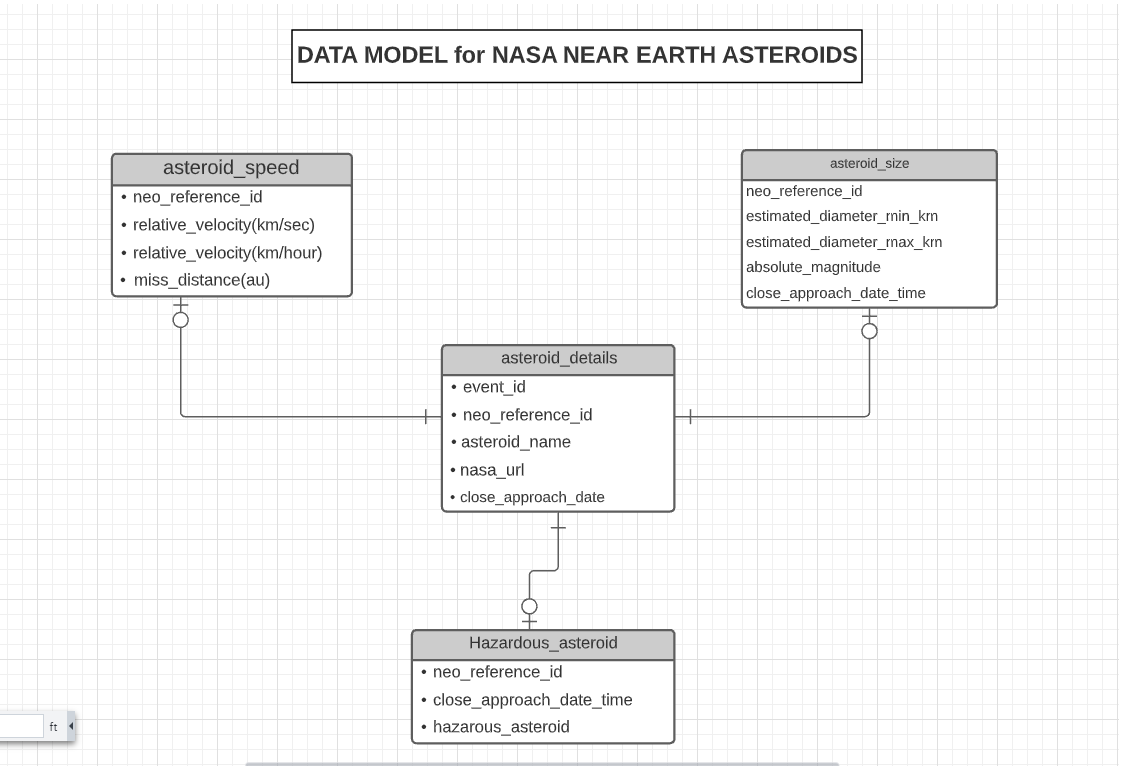

In [96]:
asteroids_details = asteroids_df[['neo_reference_id','asteroid_name','nasa_url','close approach date']].copy()
asteroids_details['event_ID'] = asteroids_details.index
col = asteroids_details.pop('event_ID')
asteroids_details.insert(0, 'event_ID', col)
asteroids_details.to_csv("asteroid_details.csv", index=False)
asteroids_details



,event_ID,neo_reference_id,asteroid_name,nasa_url,close approach date
0,0,2315098,315098 (2007 EX),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2315098,2021-06-01
1,1,2391451,391451 (2007 FE20),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2391451,2021-06-01
2,2,3530350,(2010 MB),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3530350,2021-06-01
3,3,3655398,(2013 YR2),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3655398,2021-06-01
4,4,2467460,467460 (2006 JF42),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2467460,2021-06-02
...,...,...,...,...,...
941,941,2488803,488803 (2005 GB120),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2488803,2021-12-28
942,942,3042555,(2000 LG6),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3042555,2021-12-28
943,943,3566360,(2011 KB),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3566360,2021-12-28
944,944,3590078,(2011 XF),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3590078,2021-12-28


In [128]:
asteroids_speed_df = asteroids_df[['neo_reference_id','relative velocity_km_per_secon','relative velocity_km_per_hour','close approach: Earth miss distance']].copy()
asteroids_speed_df.to_csv("asteroid_speed.csv", index=False)
asteroids_speed_df

,neo_reference_id,relative velocity_km_per_secon,relative velocity_km_per_hour,close approach: Earth miss distance
0,2315098,18.8019361621,67686.9701834927,40.520104
1,2391451,4.0661511721,14638.144219627,64.966402
2,3530350,17.2266415471,62015.9095697382,67.037057
3,3655398,3.4165750877,12299.6703155698,37.824836
4,2467460,22.1053567786,79579.2844030493,44.464515
...,...,...,...,...
941,2488803,14.8434419124,53436.3908846058,68.196364
942,3042555,4.5897214612,16522.997260155,24.769991
943,3566360,17.2314561063,62033.2419827113,66.857944
944,3590078,3.5932422538,12935.6721135919,44.232532


In [21]:
Hazardous_asteroids_df = asteroids_df[['neo_reference_id','close approach date time','hazardous asteroid']].copy()
Hazardous_asteroids_df.to_csv("asteroid_hazardous.csv", index=False)
Hazardous_asteroids_df

,neo_reference_id,close approach date time,hazardous asteroid
0,2315098,2021-Jun-01 10:06,False
1,2391451,2021-Jun-01 22:50,False
2,3530350,2021-Jun-01 06:02,False
3,3655398,2021-Jun-01 17:20,False
4,2467460,2021-Jun-02 20:12,True
...,...,...,...
941,2488803,2021-Dec-28 02:39,False
942,3042555,2021-Dec-28 14:39,False
943,3566360,2021-Dec-28 19:42,False
944,3590078,2021-Dec-28 04:34,False


In [22]:
asteroids_size_df = asteroids_df[['neo_reference_id','estimated diameter_min_km','estimated diameter_max_km','absolute_magnitude','close approach date time']].copy()
asteroids_size_df.to_csv("asteroid_size.csv", index=False)
asteroids_size_df

,neo_reference_id,estimated diameter_min_km,estimated diameter_max_km,absolute_magnitude,close approach date time
0,2315098,1.149622,2.570632,16.82,2021-Jun-01 10:06
1,2391451,0.334622,0.748238,19.50,2021-Jun-01 22:50
2,3530350,0.031956,0.071456,24.60,2021-Jun-01 06:02
3,3655398,0.038420,0.085909,24.20,2021-Jun-01 17:20
4,2467460,0.384198,0.859093,19.20,2021-Jun-02 20:12
...,...,...,...,...,...
941,2488803,0.211132,0.472106,20.50,2021-Dec-28 02:39
942,3042555,0.004213,0.009420,29.00,2021-Dec-28 14:39
943,3566360,0.025384,0.056760,25.10,2021-Dec-28 19:42
944,3590078,0.076658,0.171412,22.70,2021-Dec-28 04:34


In [123]:
import psycopg2

password=keyring.get_password('test','user') 


con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

cur = con.cursor()
cur.execute("""CREATE TABLE asteroid_details(event_id integer PRIMARY KEY, 
                    neo_reference_id integer,
                    asteroid_name varchar, nasa_url varchar,
                    close_approach_date DATE)""")
cur.execute("""CREATE TABLE hazardous_asteroid(neo_reference_id integer,
                    close_approach_date_time DATE,
                    hazardous_asteroid Boolean)""")
cur.execute("""CREATE TABLE asteroid_size(neo_reference_id integer ,
                    estimated_diameter_min_km float,
                    estimated_diameter_max_km float,
                    absolute_magnitude float, 
                    close_approach_date_time DATE)""")
cur.execute("""CREATE TABLE asteroid_speed(neo_reference_id integer ,
                    relative_velocity_km_per_secon float,
                    relative_velocity_km_per_hour float,
                    miss_distance_kilometer float)""")
con.commit()
con.close()

In [124]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
with open('asteroid_details.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_details', sep=',')

con.commit()




In [125]:
# cursor
cur = con.cursor()
with open('asteroid_size.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_size', sep=',')

con.commit()


In [126]:
# cursor
cur = con.cursor()
with open('asteroid_speed.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'asteroid_speed', sep=',')

con.commit()


In [127]:
# cursor
cur = con.cursor()
with open('asteroid_hazardous.csv', 'r') as f:
    # Notice that we don't need the `csv` module.
    next(f) # Skip the header row.
    cur.copy_from(f, 'hazardous_asteroid', sep=',')

con.commit()
con.close()

what is hazardouse asteroid max size?.

In [130]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT hazardous_asteroid,MAX(absolute_magnitude) as max_magnitude 
               FROM hazardous_asteroid             
               INNER JOIN asteroid_size
               ON hazardous_asteroid.neo_reference_id = asteroid_size.neo_reference_id
               GROUP BY hazardous_asteroid
               ORDER BY max_magnitude''')
#records = cur.fetchall()
#print(records)
for row in cur:
    print(row)
cur.close()
con.close()

(True, 22.05)
(False, 30.7)


In [16]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT asteroid_size.asteroid_id,absolute_magnitude,asteroid_found_year
FROM asteroid_size
INNER JOIN asteroid_details
ON asteroid_size.asteroid_id = asteroid_details.asteroid_id
Where asteroid_found_year
Between 2010 and 2020
order by asteroid_found_year desc;''')
#records = cur.fetchall()
#print(records)
for row in cur:
    print(row)
cur.close()
con.close()

(54017045, 23.8, 2020)
(54017167, 18.86, 2020)
(54055076, 26.3, 2020)
(54102026, 25.73, 2020)
(54073338, 29.63, 2020)
(54079787, 24.2, 2020)
(54075978, 28.38, 2020)
(54055066, 27.5, 2020)
(54017662, 24.6, 2020)
(54065916, 28.8, 2020)
(54102019, 23.37, 2020)
(54076927, 26.0, 2020)
(54016461, 26.9, 2020)
(3991547, 24.3, 2020)
(54054609, 30.38, 2020)
(54051068, 24.7, 2020)
(54087653, 25.945, 2020)
(54051185, 23.2, 2020)
(54016667, 24.8, 2020)
(54076013, 26.09, 2020)
(3989654, 26.6, 2020)
(3991654, 29.8, 2020)
(54016676, 22.1, 2020)
(54075297, 22.1, 2020)
(3989315, 29.9, 2020)
(54055074, 20.77, 2020)
(3989235, 27.2, 2020)
(3869320, 26.7, 2019)
(3879168, 27.7, 2019)
(3884023, 27.3, 2019)
(3879167, 26.3, 2019)
(3843777, 24.8, 2019)
(3879314, 24.2, 2019)
(3873141, 25.7, 2019)
(3872623, 22.9, 2019)
(3879728, 26.6, 2019)
(3843371, 20.97, 2019)
(3843858, 18.06, 2019)
(3837881, 19.64, 2019)
(3872646, 25.4, 2019)
(3869331, 26.8, 2019)
(3879235, 26.1, 2019)
(3838102, 26.3, 2019)
(3883104, 26.2, 201

How big asteroid's missing distance 7.5 kilometers?

In [131]:
import psycopg2

con = psycopg2.connect(
host = 'localhost',
database = 'asteroid_database',
user = 'postgres',
password = password,
port='5432')

# cursor
cur = con.cursor()
cur.execute('''SELECT asteroid_size.neo_reference_id,estimated_diameter_max_km,miss_distance_kilometer
FROM  asteroid_size
inner join asteroid_speed
on asteroid_size.neo_reference_id = asteroid_speed.neo_reference_id
Where miss_distance_kilometer
Between 7 and 7.5''')
#records = cur.fetchall()
#print(records)
for row in cur:
    print(row)
cur.close()
con.close()

(3477942, 0.0899580388, 7.348087035402934)
(3264188, 0.0450858206, 7.061931457494881)
